In [ ]:
1. Develop a credit risk assessment Classification model with 
Support Vector Machines using  both linear and non-linear 
kernels and evaluate their performance. 
2. Develop an image classification model with SVC 
3. Build a Regression model with SVR

# Build a Regression model with SVR

In [6]:
#import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
 #import svr
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
#Load the data
data=pd.read_excel('credit _risk.xlsx')
data

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1
...,...,...,...,...,...,...,...,...,...
94,94,23,62500,7,26000,11.71,1,2,0
95,95,23,120000,1,25600,12.69,0,3,0
96,96,24,12360,2,1600,13.57,0,3,0
97,97,22,60000,0,25475,10.99,1,3,0


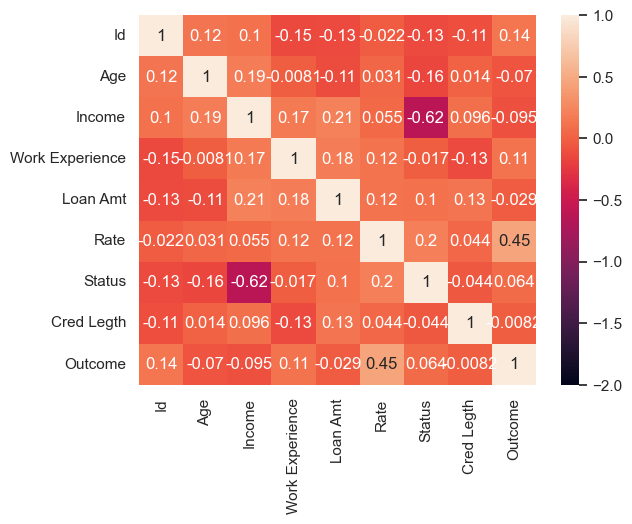

In [17]:
#plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-2)
plt.show()

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Loan Amt'}>,
        <Axes: title={'center': 'Rate'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Cred Legth'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

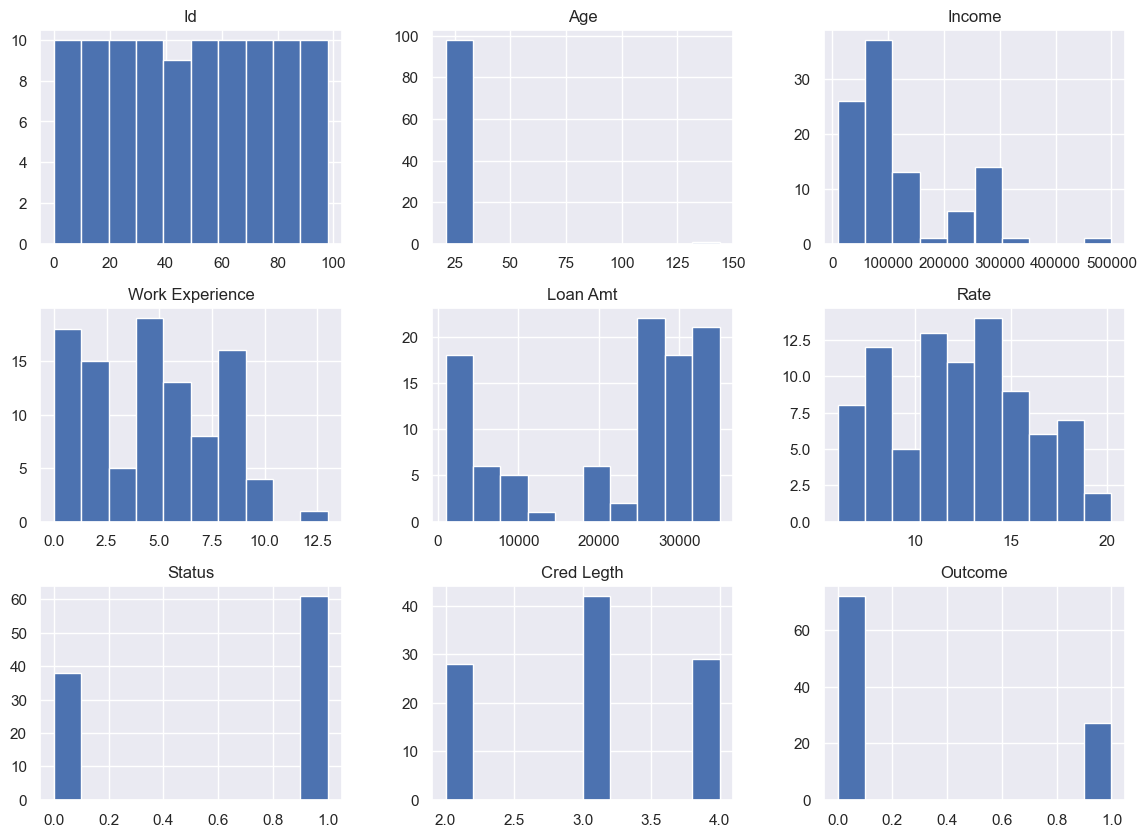

In [19]:
data.hist(figsize=(14,10))

In [20]:
data.isna().sum()

Id                  0
Age                 0
Income              0
Work Experience     0
Loan Amt            0
Rate               12
Status              0
Cred Legth          0
Outcome             0
dtype: int64

In [29]:
data=data.fillna(method='bfill')
data.isna().sum()

Id                 0
Age                0
Income             0
Work Experience    0
Loan Amt           0
Rate               0
Status             0
Cred Legth         0
Outcome            0
dtype: int64

<Axes: >

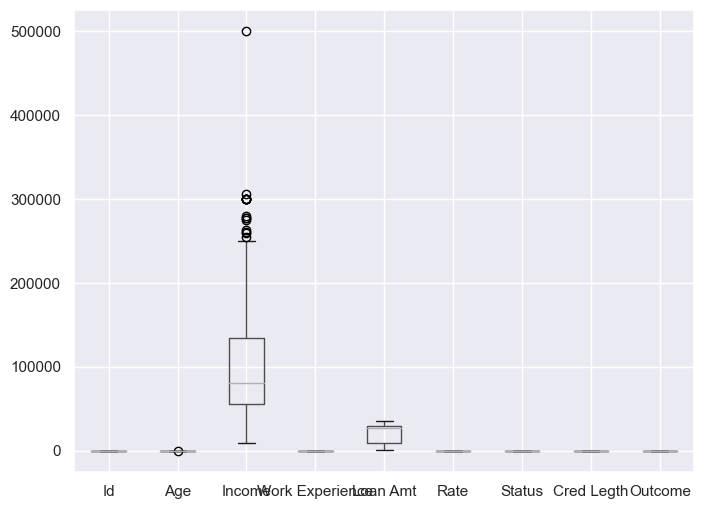

In [30]:
data.boxplot(figsize=(8,6))

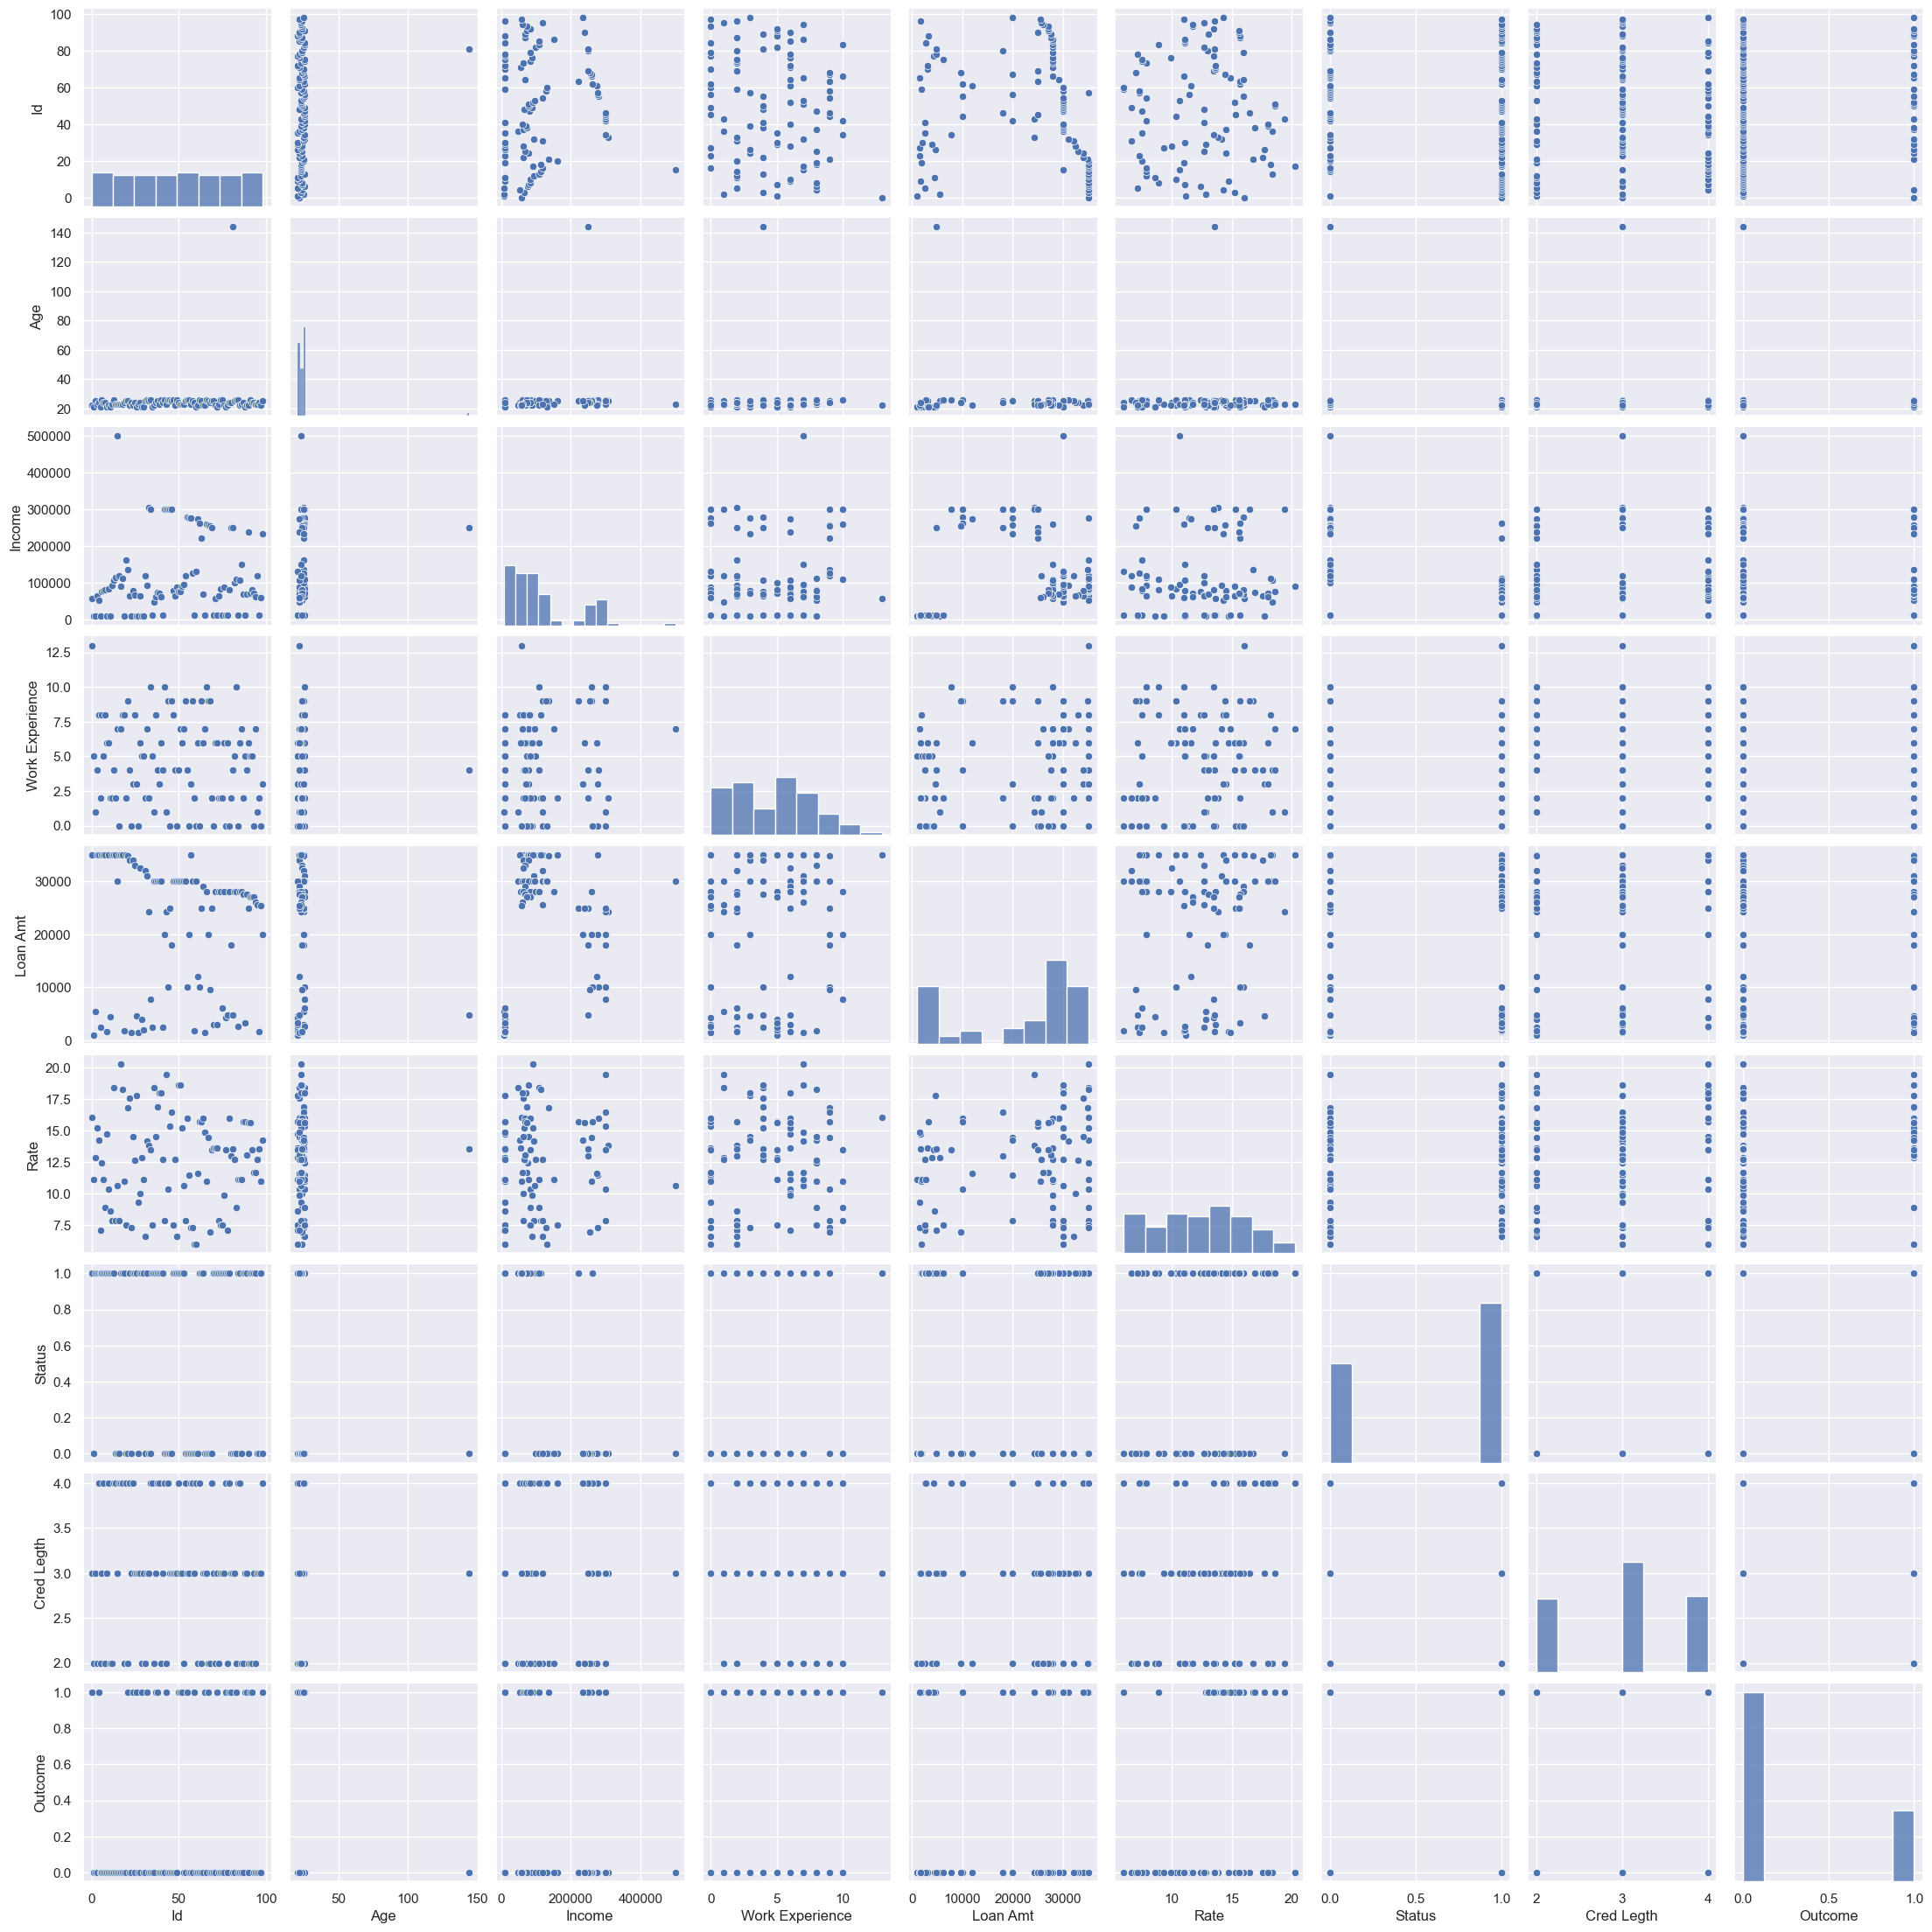

In [31]:
sns.pairplot(data)

In [32]:

data.head(2)

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0


In [33]:
 x=data.iloc[:,:-1]
 y=data.iloc[:,-1:]
 print('X shape:\t',x.shape)
 print()
 print('Y shape:\t',y.shape)

X shape:	 (99, 8)

Y shape:	 (99, 1)


In [34]:
 xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
 print('****************Training Data Shape********************\n')
 print('Training data-X- Shape:\t',xtrain.shape)
 print()
 print('Training data-y- Shape:\t',ytrain.shape)
 print()
 print('****************Testing Data Shape********************\n')
 print('Testing data(x-Input) Shape:\t',xtest.shape)
 print()
 print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (89, 8)

Training data-y- Shape:	 (89, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (10, 8)

Testing data(y-Outcome) Shape:	 (10, 1)


In [35]:
# #SVR with Non linear kernal - linear
support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted price:
 [-111.28080836   57.6897169   573.62692651  116.16506585  544.45712861
  -21.30986539 -385.05676869  -14.83135739   -2.69889823 -399.77367964]
Mean Squared Error:	 96322.5003479614

RMSE:	 310.35866404526456

R-Square value:	 -1070249.0038662376


In [37]:
#SVR with Non linear kernal - rbf
support_reg=SVR()
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [0.09977705 0.10055428 0.09968062 0.09976971 0.10003928 0.1005636
 0.10050913 0.10056517 0.09985754 0.09988791]
Mean Squared Error:	 0.09007028887228205

RMSE:	 0.30011712525659384

R-Square value:	 -0.000780987469800376


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
 #SVR with Non linear kernal - sigmoid
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [-1.85152622  1.63895944  9.24996946 -1.54920676 -0.05241822  1.69405772
  2.01802038  1.68792149 -1.54526869 -0.66215541]
Mean Squared Error:	 11.079509703254194

RMSE:	 3.328589746912977

R-Square value:	 -122.10566336949103


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Support Vector Classification model

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

In [165]:
data=pd.read_csv('credit _risk.csv')
data.head()

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1


In [ ]:
#Linear Data

In [166]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [168]:
data=pd.read_csv('credit _risk.csv')
data.head()

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1


In [169]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [170]:
y_pred = svm_classifier.predict(xtest)

In [171]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

In [172]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
#using sigmoid non linear

In [173]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(xtrain, ytrain)

SVC(kernel='sigmoid')

In [174]:
y_pred = svm_classifier.predict(xtest)

In [175]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10



In [ ]:
#using rbf

In [176]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(xtrain, ytrain)

SVC()

In [177]:
y_pred = svm_classifier.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
#visulaziation

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

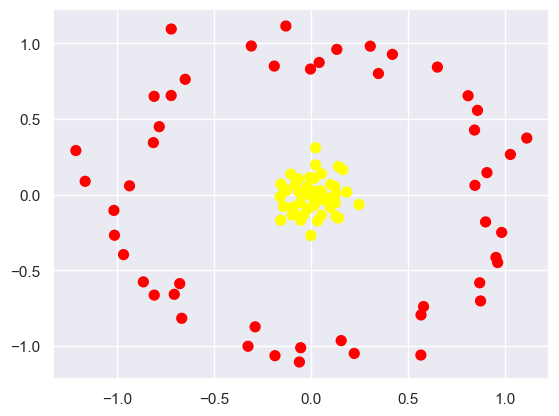

In [221]:
data=pd.read_csv('credit _risk.csv')
data.head()
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

(-1.0, 4.0)

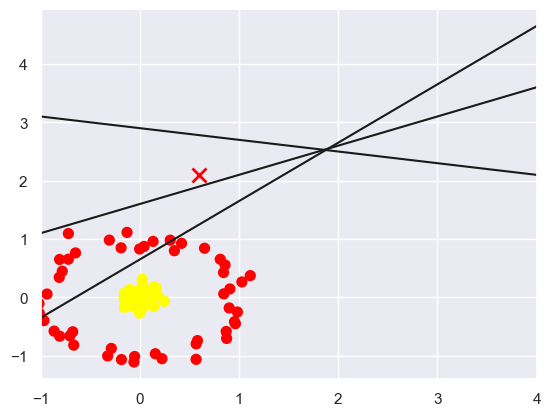

In [223]:
xfit=np.linspace(-1,4)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,4)

(-1.0, 3.5)

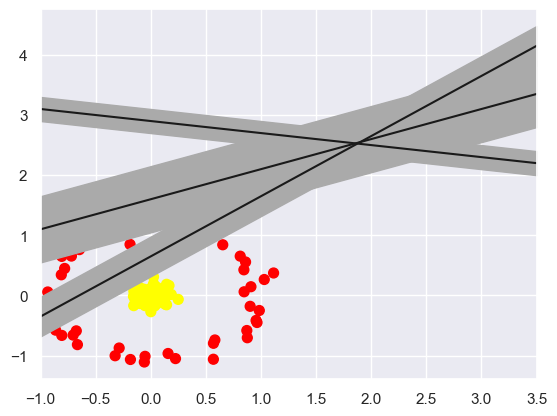

In [224]:
    xfit=np.linspace(-1,3.5)
    plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
    
    for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
        yfit=m*xfit+b
        plt.plot(xfit,yfit,'-k')
        plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA')
plt.xlim(-1,3.5)

In [183]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [184]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim() 
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
     # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
       levels=[-1, 0, 1], alpha=0.5,
       linestyles=['--', '-', '--'])
    
     # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
         s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

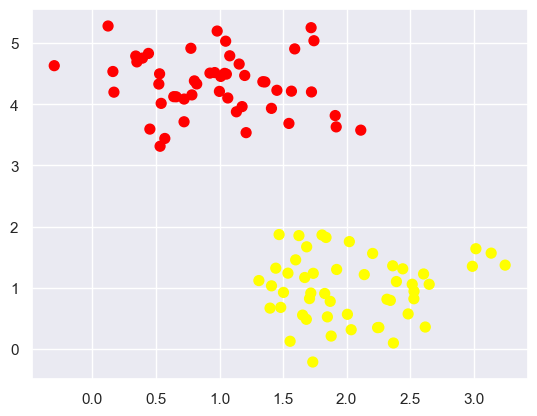

In [190]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
              

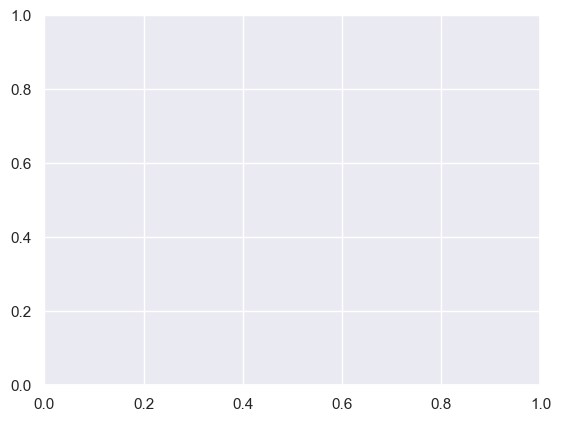

In [191]:
plot_svc_decision_function(model)

In [192]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [207]:
  def plot_svm(N=10, ax=None):
    X, y = credit _risk(n_samples=200, centers=2,
                random_state=0, cluster_std=0.60)
    
     X = X[:N]
        y = y[:N]
        model = SVC(kernel='linear', C=1E10)
        model.fit(X, y)

SyntaxError: invalid syntax (212814413.py, line 2)

In [200]:
 from ipywidgets import interact,fixed

In [201]:
interact(plot_svm,N=[10,100,200,400,234],ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 100, 200, 400, 234), value=10), Output()), _dom_c…

<function __main__.plot_svm(N=10, ax=None)>

In [ ]:
#non linear

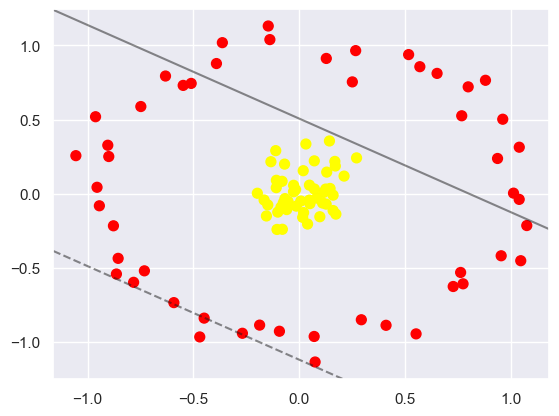

In [203]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

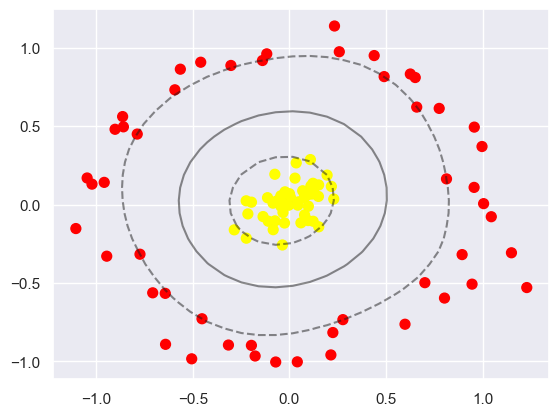

In [204]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='rbf').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

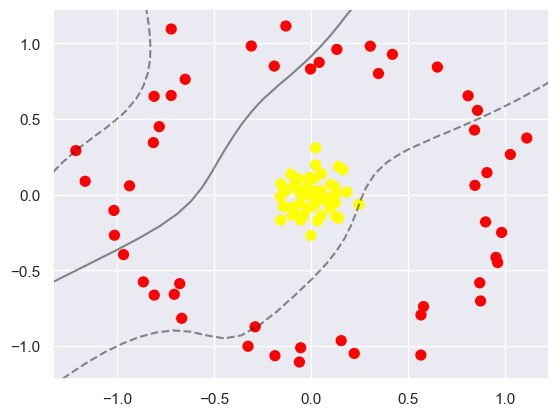

In [206]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='sigmoid').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

# Face Recognition with SVC

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print()
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']

(1140, 62, 47)


In [249]:
fig,ax=plt.subplots(2,3)
for i ,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]]
    

SyntaxError: incomplete input (3148063794.py, line 5)

In [253]:
from sklearn.model_selection import train_test_split
 xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,randoms=20)
 print('****************Training Data Shape********************\n')
 print('Training data-X- Shape:\t',xtrain.shape)
 print()
 print('Training data-y- Shape:\t',ytrain.shape)
 print()
 print('****************Testing Data Shape********************\n')
 print('Testing data(x-Input) Shape:\t',xtest.shape)
 print()
 print('Testing data(y-Outcome) Shape:\t',ytest.shape)

IndentationError: unexpected indent (2875854618.py, line 2)

In [252]:
 #Model parameter configuration
    from sklearn.model_selection import train_test_split
    from sklearn.decomposition import PCA
    from sklearn.pipeline import make_pipeline
    pca=PCA(n_components=150,whiten=True,random_state=42)
    svc=SVC(kernel='rbf',class_weight='balanced')
    pipe_model=make_pipeline(pca,svc)
   #train the model
    from sklearn.model_selection import GridSearchCV # to get optimum parameter
    param_grid={'svc__C':[1,5,10,20,50],
    'svc__gamma':[0.0001,0.0005,0.001,0.005]
           }
    grid=GridSearchCV(pipe_model,param_grid)
    %time grid.fit(xtrain,ytrain)
    print(grid.best_params_)

IndentationError: unexpected indent (463809061.py, line 2)

In [ ]:
model=grid.best_estimator_
 print(model)

In [ ]:
#Test the model
 yfit=model.predict(xtest)
 yfit

In [ ]:
fig,ax=plt.subplots(6,8)
 for i ,axi in enumerate(ax.flat):
 axi.imshow(xtest[i].reshape(62,47))
 axi.set(xticks=[],yticks=[])
 axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
 fig.suptitle('Predicted Names; Incorrect Labels in Red',size=1

In [ ]:
fig,ax=plt.subplots(2,2)
 for i ,axi in enumerate(ax.flat):
 axi.imshow(xtest[i].reshape(62,47),cmap='bone')
 axi.set(xticks=[],yticks=[])
 axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
 fig.suptitle('Predicted Names; Incorrect Labels in Red',s

In [ ]:
 fig,ax=plt.subplots(4,5)
 for i ,axi in enumerate(ax.flat):
 axi.imshow(xtest[i].reshape(62,47),cmap='bone')
 axi.set(xticks=[],yticks=[])
 axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
 fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14

In [ ]:
 from sklearn.metrics import classification_report,accuracy_score,confusion_
 print('='*80)
 print('Accuracy Score:\n',accuracy_score(ytest,yfit))
 print('='*80)
 print('Confusion Matrix:\n',confusion_matrix(ytest,yfit))
 print('-'*80)
 print('Classification Report:\n',classification_report(ytest,yfit,target_na
 print('='*80

In [ ]:
cm=confusion_matrix(ytest,yfit)
 sns.heatmap(cm,annot=True,fmt='d',xticklabels=faces.target_names,yticklabel
 plt.xlabel('True label')
 plt.ylabel('Predicted label')